# Reconnaissance du son d'un frelon

### Découpage de la vidéo

Découpage de la vidéo https://www.youtube.com/watch?v=WW2pslED0v8 pour savoir si l'on entend un frelon ou pas.

`Tests` contient les intervalles de temps où un frelon est présent dans les 3 premières minutes de la vidéo. Sous forme :
```python
dict = {
    (début en chaine de caractères, fin): True si Il y a un frelon, False si il y a des abeilles
}
```

In [2]:
# Import les valeurs de tests
from tests import Tests

Tests.abeilles_frelons

{('0', '0.06'): True,
 ('0.45', '0.55'): False,
 ('1.02', '1.08'): True,
 ('1.15', '1.17'): True,
 ('1.35', '1.54'): False,
 ('1.55', '2.05'): True,
 ('2.14', '2.19'): True,
 ('2.25', '2.30'): True,
 ('2.34', '2.40'): True,
 ('2.56', '3.08'): True,
 ('3.08', '3.20'): False,
 ('3.44', '3.50'): False,
 ('3.51', '3.56'): True}

### Observation des sons

Utilisation de la bibliothèque `scipy.io` pour afficher les sons.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read

number of channels = 2
length = 570.9322448979592s


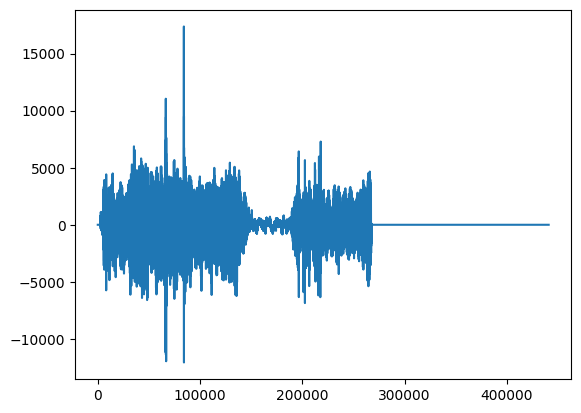

In [3]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier audio WAV
FILE = "echantillons/abeilles_frelons.wav"

def signal():
    """
    Retourne le signal du fichier dans FILE
    """
    FILE_NAME = FILE

    samplerate, data = wavfile.read(FILE_NAME)
    print(f"number of channels = {data.shape[1]}")

    length = data.shape[0] / samplerate
    print(f"length = {length}s")

    return (data, length, samplerate)

def plot(signal_, show=True):
    """
    Affiche le signal signal_ dans matplotlib

    Paramètres
    ----------
    signal_:tuple
        sous forme (data, length, samplerate)
    """

    data, length, samplerate = signal_

    data = data[:, 0] # Ne choisir qu'un canal
    time = np.linspace(0., length, data.shape[0])

    plt.plot(time, data, label="") # label="Frequence"
    """plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")"""
    if show:
        plt.show()

def get(signal, start, end):
    """
    Renvoie le signal d'un temps de départ à un temps d'arrivée

    Parametres
    ----------
    signal:tuple
        signal sous forme de (data, length, samplerate)
    start:int
        Temps de départ en secondes
    end:int
        Temps de fin en secondes
    """
    data, length, samplerate = signal

    start_sample = int(start * samplerate)
    end_sample = int(end * samplerate)

    return (data[start_sample:end_sample], data[start_sample:end_sample].shape[0], samplerate)

plot(get(signal(), 0, 10))


Maintenant, on peut utiliser ces fonctions pour ne récupérer que les sons de frelons ou d'abeilles à partir du fichier `tests.py`

In [4]:
def minutes_to_seconds(minutes):
    """
    Renvoies le temps en nombre de secondes. minutes -> "1.15"
    """
    liste = minutes.split(".")

    return sum([(60**i)*int(liste[len(liste)-i-1]) for i in range(0, len(liste))])

print(minutes_to_seconds("1.20"))

# Récupérer les signaux correspondants aux abeilles et aux frelons
signaux = {
    "abeille": [],
    "frelon": [],
}

SIGNAL = signal()

for key in Tests.abeilles_frelons: # key -> ("début en minutes", "fin en minutes")
    debut, fin = minutes_to_seconds(key[0]), minutes_to_seconds(key[1])
    signal_ =  get(SIGNAL, debut, fin)

    if Tests.abeilles_frelons[key]:
        signaux["frelon"].append(signal_)
    else:
        signaux["abeille"].append(signal_)

signaux

80
number of channels = 2
length = 570.9322448979592s


{'abeille': [(array([[-167, -141],
          [-128, -134],
          [-125, -130],
          ...,
          [1957, 1974],
          [1343, 1385],
          [ 723,  731]], shape=(441000, 2), dtype=int16),
   441000,
   44100),
  (array([[-232, -240],
          [-211, -209],
          [-209, -206],
          ...,
          [ 557,  536],
          [ 532,  488],
          [ 542,  476]], shape=(837900, 2), dtype=int16),
   837900,
   44100),
  (array([[-1335, -1298],
          [-1299, -1278],
          [-1077, -1125],
          ...,
          [   34,   139],
          [ -102,  -141],
          [  650,   569]], shape=(529200, 2), dtype=int16),
   529200,
   44100),
  (array([[-338, -235],
          [-699, -501],
          [-735, -455],
          ...,
          [-369, -392],
          [-400, -444],
          [-393, -455]], shape=(264600, 2), dtype=int16),
   264600,
   44100)],
 'frelon': [(array([[   0,    0],
          [   0,    0],
          [   0,    0],
          ...,
          [4106, 40

Avec ces fichiers, on peut afficher les courbes pour les abeilles puis celles pour les frelons. (**A continuer**)

4 9


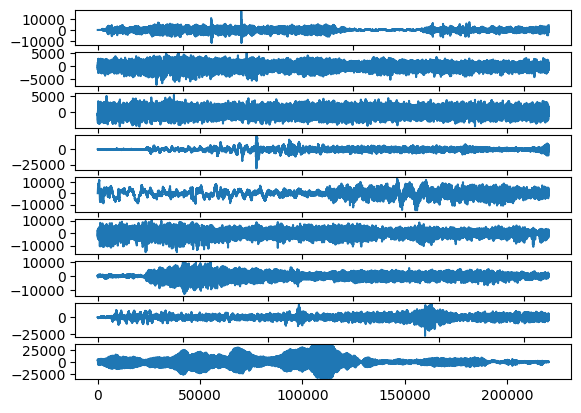

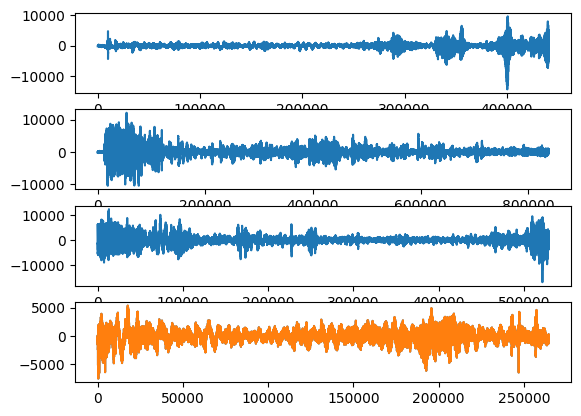

In [5]:
taille_frelon = len(signaux["frelon"])
taille_abeille = len(signaux["abeille"])
max_ = max(taille_frelon, taille_abeille)
print(taille_abeille, taille_frelon)

figure = 1
plt.figure(1)

for son_frelon in signaux["frelon"]:
    plt.subplot(max_, 1, figure)
    plot(son_frelon, False)
    figure += 1

figure = 1

plt.figure(2)

for son_abeille in signaux["abeille"]:
    plt.subplot(taille_abeille, 1, figure)
    plot(son_abeille, False)
    figure += 1

plot(son_abeille)

### Spectogramme

Réalisation d'un spectogramme pour observer certaines différences entre les abeilles et les frelons  
https://www.python-simple.com/python-matplotlib/graphes-multiples.php

4 9


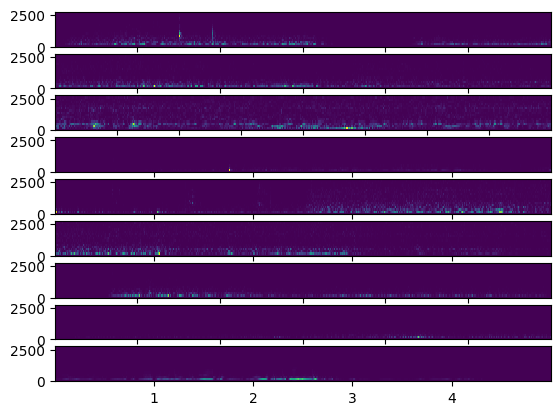

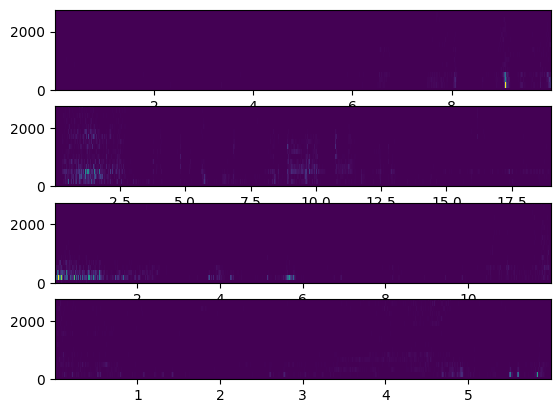

In [6]:
from scipy import signal

def spectograme(signal_, show=True):
    data, length, rate = signal_

    # Select one channel if stereo
    x = data[:, 0]

    # Compute the spectrogram
    f, t, Sxx = signal.spectrogram(x, rate)

    # Plot the spectrogram
    plt.pcolormesh(t, f, Sxx)
    """plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title('Spectrogram')"""

    plt.ylim(0, 2750)  # Plage de fréquence

    if show:
        plt.show()


taille_frelon = len(signaux["frelon"])
taille_abeille = len(signaux["abeille"])
max_ = max(taille_frelon, taille_abeille)
print(taille_abeille, taille_frelon)

figure = 1
plt.figure(1)

for son_frelon in signaux["frelon"]:
    plt.subplot(max_, 1, figure)
    spectograme(son_frelon, False)
    figure += 1

figure = 1

plt.figure(2)

for son_abeille in signaux["abeille"]:
    plt.subplot(taille_abeille, 1, figure)
    spectograme(son_abeille, False)
    figure += 1

spectograme(son_abeille)

### Récupérer fréquence

**Echantillonage du signal**  
**Calcul de la Transformé de Fourier Rapide (FFT)**  
**Identification de la fréquence dominante**  
https://cpge.frama.io/fiches-cpge/Python/Analyse%20fr%C3%A9quentielle%20(FFT)/01%20-%20Transform%C3%A9e%20de%20Fourier%201D/#cas-dun-fichier-audio

In [7]:
def frequence(signal_, show=True):
    data, length, samplerate = signal_

    data = data[:, 0]

    X = np.fft.fft(data)
    freq = np.fft.fftfreq(data.size, d=1/samplerate)

    N = data.size

    X_abs = np.abs(X[:N//2])*2.0/N
    freq_pos = freq[:N//2]

    if show:
      plt.plot(freq_pos, X_abs, label="Amplitude absolue")
      plt.xlim(0, 1000)  # On réduit la plage des fréquences à la zone utile
      plt.grid()
      plt.xlabel(r"Fréquence (Hz)")
      plt.ylabel(r"Amplitude $|X(f)|$")
      plt.title("Transformée de Fourier")
      plt.show()

    return freq_pos, X_abs

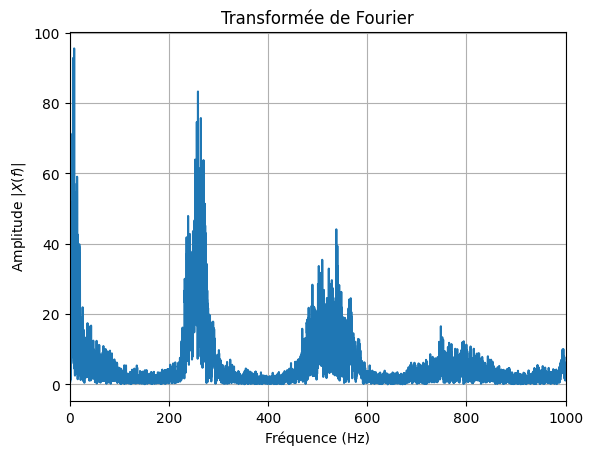

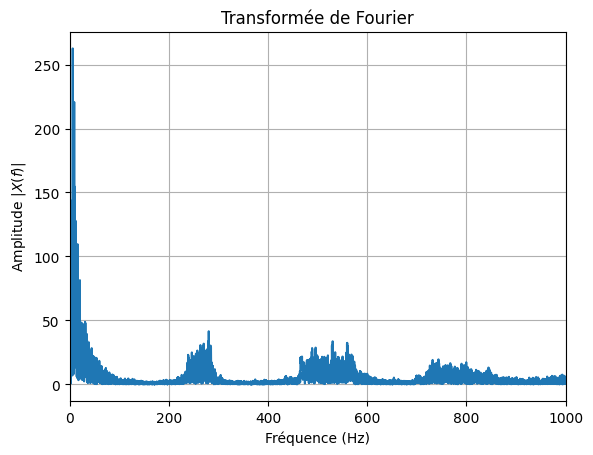

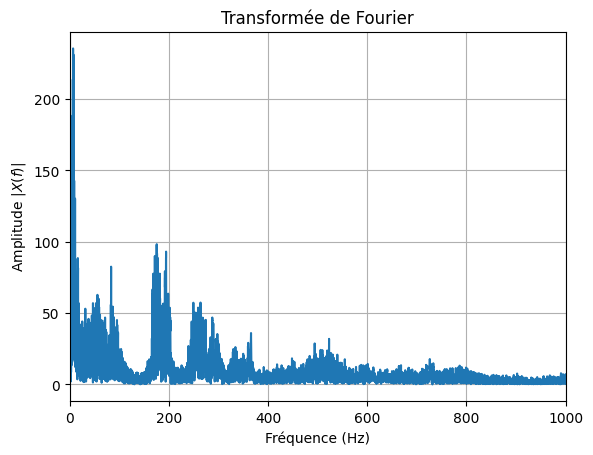

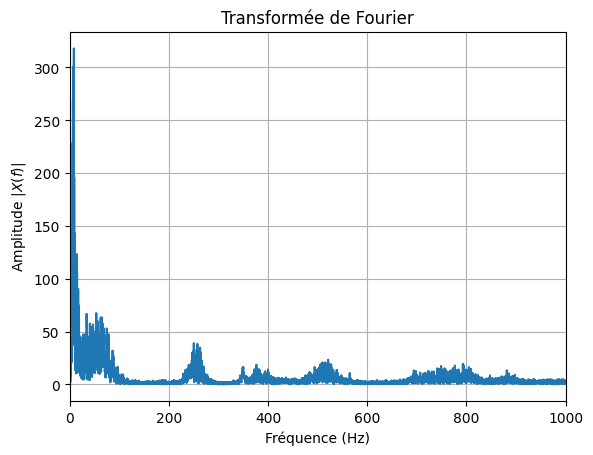

frelon


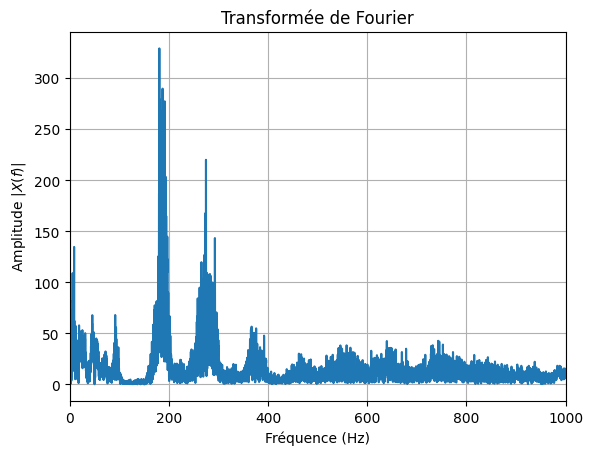

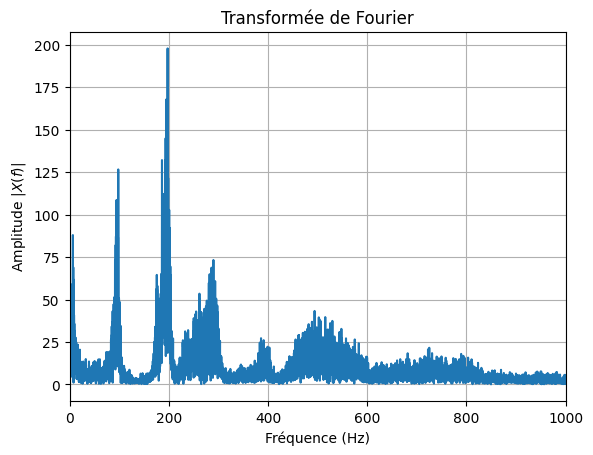

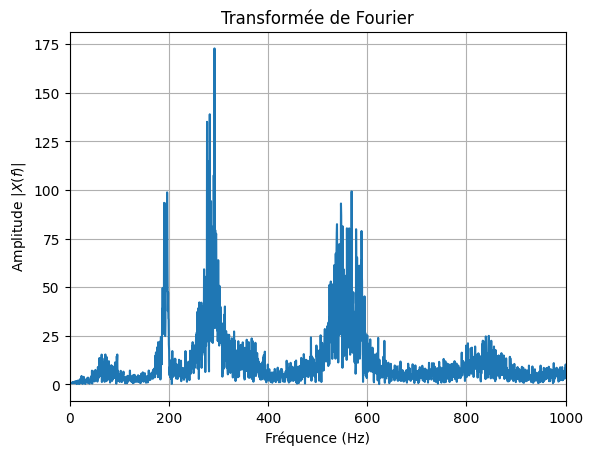

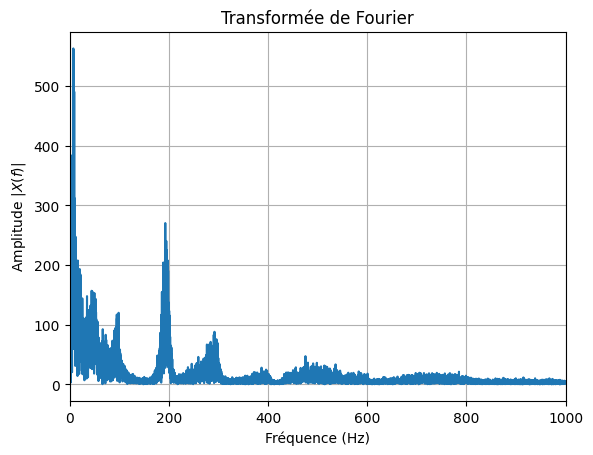

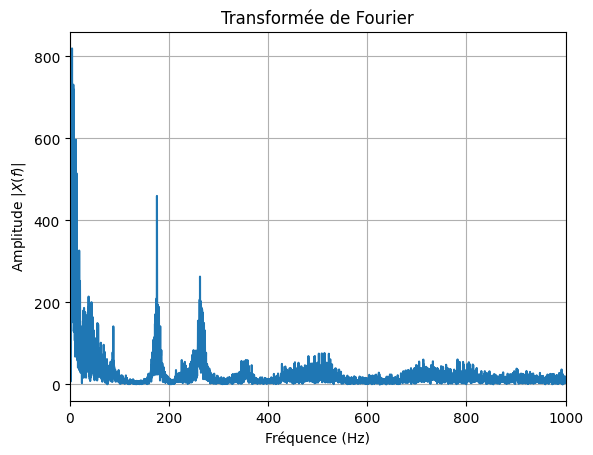

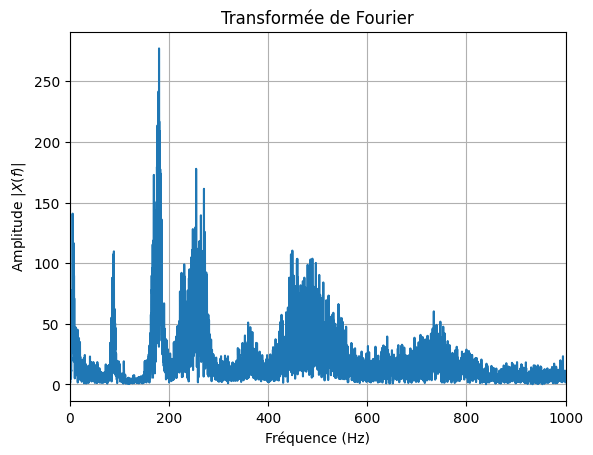

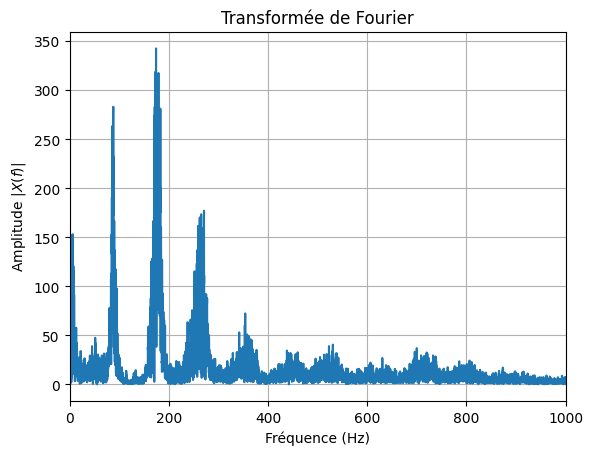

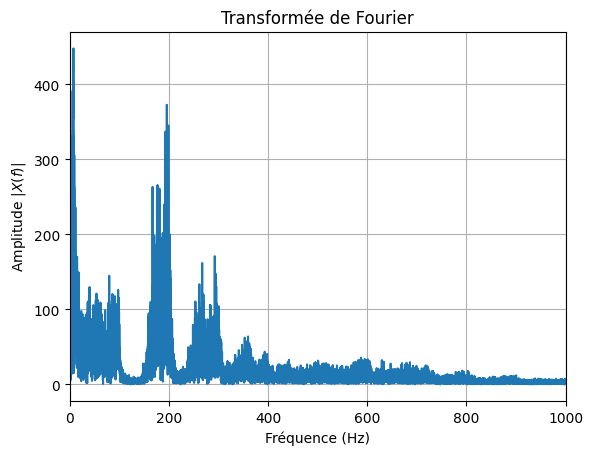

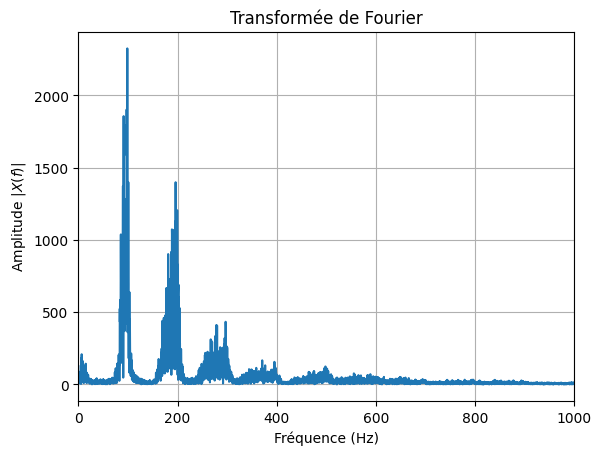

In [8]:
for son_abeille in signaux["abeille"]:
    frequence(son_abeille)

print("frelon")

for son_frelon in signaux["frelon"]:
    frequence(son_frelon)

### Détecter frelons

**Detecter frelons** (50 < Fréquence < 100)  
**Detecter abeilles**  
**Detecter autre**  

In [9]:
def detecter_frelon(signal_, frelon=(100,200), min_amplitude=100):
  amplitude, frequence_ = frequence(signal_, show=False)

  for i in range(len(amplitude)):
    if frelon[0] <= frequence_[i] <= frelon[1] and amplitude[i] >= min_amplitude:
      return True
  return False


In [10]:
for son_abeille in signaux["abeille"]:
    print(detecter_frelon(son_abeille))

for son_frelon in signaux["frelon"]:
  print(detecter_frelon(son_frelon))

False
False
False
False
True
True
True
True
True
True
True
True
True


### Tests

**Finir de compléter la classe Test**  
**Découper le son toutes les n secondes**  
**Voir si ça correspond**

In [ ]:
def intervals_overlap(start1, end1, start2, end2):
    """
    Vérifie si deux intervalles [start1, end1] et [start2, end2] se chevauchent.
    """
    return max(start1, start2) < min(end1, end2)

def tests2(frelon, min_amplitude):
    incr = 5
    start, end = 0, incr
    vals = []

    while end < SIGNAL[1]:
        frel = detecter_frelon(get(SIGNAL, start, end), frelon, min_amplitude)

        for i in Tests.abeilles_frelons:
            test_start = minutes_to_seconds(i[0])
            test_end = minutes_to_seconds(i[1])

            # Vérifier le chevauchement
            if intervals_overlap(start, end, test_start, test_end):
                if frel == Tests.abeilles_frelons[i]:
                    vals.append(True)
                else:
                    vals.append(False)
                break

        start += incr
        end += incr

    return vals.count(True) * 100 / len(vals)

results = {}
min_amplitude = 100

for frelon1 in range(100, 250, 10):
    for frelon2 in range(frelon1, 300, 10):
        score = tests2((frelon1, frelon2), min_amplitude)
        print(score)

        if score in results:
            results[score].append((frelon1, frelon2, min_amplitude))
        else:
            results[score] = [(frelon1, frelon2, min_amplitude)]

score = max(results)
print(results[score])

37.03703703703704
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
37.03703703703704
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
37.03703703703704
70.37037037037037
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.77777777777777
77.7777777

In [14]:
best_results = [(150, 170, 100), (150, 180, 100), (150, 190, 100), (150, 200, 100), (150, 210, 100), (150, 220, 100), (150, 230, 100), (150, 240, 100), (150, 250, 100), (150, 260, 100), (150, 270, 100), (150, 280, 100), (150, 290, 100), (160, 170, 100), (160, 180, 100), (160, 190, 100), (160, 200, 100), (160, 210, 100), (160, 220, 100), (160, 230, 100), (160, 240, 100), (160, 250, 100), (160, 260, 100), (160, 270, 100), (160, 280, 100), (160, 290, 100)]

def tests(frelon, min_amplitude):
    vals = []

    for start_, end_ in Tests.abeilles_frelons:
        start = minutes_to_seconds(start_)
        end = minutes_to_seconds(end_)

        vals.append(detecter_frelon(get(SIGNAL, start, end), frelon, min_amplitude) == Tests.abeilles_frelons[(start_, end_)])

    return vals.count(True) * 100 / len(vals)

for frelon1, frelon2, min_amplitude in best_results:
    score = tests((frelon1, frelon2), min_amplitude)
    print(f"Frelon: {frelon1}-{frelon2}, Amplitude: {min_amplitude}, Score: {score}%")

Frelon: 150-170, Amplitude: 100, Score: 92.3076923076923%
Frelon: 150-180, Amplitude: 100, Score: 100.0%
Frelon: 150-190, Amplitude: 100, Score: 100.0%
Frelon: 150-200, Amplitude: 100, Score: 100.0%
Frelon: 150-210, Amplitude: 100, Score: 100.0%
Frelon: 150-220, Amplitude: 100, Score: 100.0%
Frelon: 150-230, Amplitude: 100, Score: 100.0%
Frelon: 150-240, Amplitude: 100, Score: 100.0%
Frelon: 150-250, Amplitude: 100, Score: 100.0%
Frelon: 150-260, Amplitude: 100, Score: 100.0%
Frelon: 150-270, Amplitude: 100, Score: 100.0%
Frelon: 150-280, Amplitude: 100, Score: 100.0%
Frelon: 150-290, Amplitude: 100, Score: 100.0%
Frelon: 160-170, Amplitude: 100, Score: 92.3076923076923%
Frelon: 160-180, Amplitude: 100, Score: 100.0%
Frelon: 160-190, Amplitude: 100, Score: 100.0%
Frelon: 160-200, Amplitude: 100, Score: 100.0%
Frelon: 160-210, Amplitude: 100, Score: 100.0%
Frelon: 160-220, Amplitude: 100, Score: 100.0%
Frelon: 160-230, Amplitude: 100, Score: 100.0%
Frelon: 160-240, Amplitude: 100, Score